In [1]:
# Import all dependencies:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
# Read in the dataframe:
df1 = pd.read_csv('dataframe_bangladesh.csv')
df1.head()

,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50 Thousand
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30 Thousand
2,"Smartly priced 1950 SQ FT apartment, that you ...",3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,"February 22, 2023",30 Thousand
3,2000 Sq Ft Residential Apartment Is Up For Ren...,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,"October 28, 2021",35 Thousand
4,Strongly Structured This 1650 Sq. ft Apartment...,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"February 19, 2023",25 Thousand


In [3]:
# Check the total number of rows and columns:
df1.shape

(7557, 11)

In [4]:
# START DATA CLEANING:
# Check Type of residence:
df1.groupby('type')['type'].agg('count')

type
Apartment    7489
Building       21
Duplex         47
Name: type, dtype: int64

In [5]:
# Clean the data:
# Drop the unnecessary columns:
df2 = df1.drop(['title','purpose','flooPlan','url','lastUpdated'],axis='columns')
df2.head()

,beds,bath,area,adress,type,price
0,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,50 Thousand
1,3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,30 Thousand
2,3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,30 Thousand
3,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,35 Thousand
4,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,25 Thousand


In [6]:
# check if null or not:
df2.isnull().sum()
# if null then drop:
df3 = df2.dropna()

In [7]:
df3.shape

(7557, 6)

In [8]:
# check total bedrooms:
df3['beds'].unique()

array(['3 ', '5 ', '4 ', '1 Bed', '2 ', '17 ', '6 ', '21 ', '7 ', '20 ',
       '32 ', '22 ', '36 '], dtype=object)

In [9]:
# create new column free of anomaly:
df3['bedroom'] = df3['beds'].apply(lambda x: int(x.split(' ')[0]))
df3.drop(columns='beds', inplace=True)
df3.head()

,bath,area,adress,type,price,bedroom
0,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,50 Thousand,3
1,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,30 Thousand,3
2,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,30 Thousand,3
3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,35 Thousand,3
4,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,25 Thousand,3


In [10]:
# convert object datatype to int:
df3['bedroom'].astype(str).astype(int)

0       3
1       3
2       3
3       3
4       3
       ..
7552    4
7553    3
7554    2
7555    3
7556    4
Name: bedroom, Length: 7557, dtype: int32

In [11]:
# check if they are valid:
df3[df3.bedroom>15]

,bath,area,adress,type,price,bedroom
181,10,"9,000 sqft","Block H, Bashundhara R-A, Dhaka",Building,3.5 Lakh,17
372,10,"16,100 sqft","Road No 2, Sector 6, Uttara, Dhaka",Building,10 Lakh,21
872,10,"14,000 sqft","Sector 11, Uttara, Dhaka",Building,5 Lakh,20
2548,10,"18,000 sqft","Block D, Bashundhara R-A, Dhaka",Building,5 Lakh,32
3966,10,"10,000 sqft","Sector 14, Uttara, Dhaka",Building,4 Lakh,22
5615,10,"19,360 sqft","Block K, Baridhara, Dhaka",Building,16.6 Lakh,21
6936,10,"31,500 sqft","Block K, Baridhara, Dhaka",Building,20 Lakh,36
7118,10,"15,000 sqft","Block K, Baridhara, Dhaka",Building,10 Lakh,20


In [12]:
df3['bedroom'].unique()

array([ 3,  5,  4,  1,  2, 17,  6, 21,  7, 20, 32, 22, 36], dtype=int64)

In [13]:
# check the area:
df3.area.unique()

array(['2,200 sqft', '1,400 sqft', '1,950 sqft', '2,000 sqft',
       '1,650 sqft', '3,400 sqft', '1,600 sqft', '1,250 sqft',
       '2,150 sqft', '1,580 sqft', '3,200 sqft', '3,000 sqft',
       '1,800 sqft', '1,750 sqft', '1,310 sqft', '1,700 sqft',
       '2,750 sqft', '2,500 sqft', '550 sqft', '1,050 sqft', '1,350 sqft',
       '3,590 sqft', '400 sqft', '2,400 sqft', '500 sqft', '2,300 sqft',
       '4,350 sqft', '1,200 sqft', '800 sqft', '2,146 sqft', '1,315 sqft',
       '1,500 sqft', '700 sqft', '600 sqft', '960 sqft', '4,200 sqft',
       '2,250 sqft', '1,517 sqft', '6,300 sqft', '1,407 sqft',
       '1,850 sqft', '1,150 sqft', '900 sqft', '1,975 sqft', '1,300 sqft',
       '1,450 sqft', '950 sqft', '1,100 sqft', '2,600 sqft', '750 sqft',
       '2,115 sqft', '3,600 sqft', '3,150 sqft', '2,100 sqft',
       '1,319 sqft', '1,676 sqft', '1,825 sqft', '2,977 sqft', '350 sqft',
       '1,550 sqft', '450 sqft', '1,190 sqft', '2,230 sqft', '2,280 sqft',
       '2,197 sqft', '1,393 sq

In [14]:
df3.area

0       2,200 sqft
1       1,400 sqft
2       1,950 sqft
3       2,000 sqft
4       1,650 sqft
           ...    
7552    3,600 sqft
7553      900 sqft
7554    1,000 sqft
7555    3,600 sqft
7556    2,600 sqft
Name: area, Length: 7557, dtype: object

In [15]:
df3['area']

0       2,200 sqft
1       1,400 sqft
2       1,950 sqft
3       2,000 sqft
4       1,650 sqft
           ...    
7552    3,600 sqft
7553      900 sqft
7554    1,000 sqft
7555    3,600 sqft
7556    2,600 sqft
Name: area, Length: 7557, dtype: object

In [16]:
df3.area[0] 

'2,200 sqft'

In [17]:
# remove the extra words from the object:
df3['area'] = df3['area'].str.replace('sqft','')
df3.head()

,bath,area,adress,type,price,bedroom
0,4,"2,200","Block A, Bashundhara R-A, Dhaka",Apartment,50 Thousand,3
1,4,"1,400","South Khulshi, Khulshi, Chattogram",Apartment,30 Thousand,3
2,4,"1,950","Block F, Bashundhara R-A, Dhaka",Apartment,30 Thousand,3
3,3,"2,000","Sector 9, Uttara, Dhaka",Apartment,35 Thousand,3
4,4,"1,650","Block I, Bashundhara R-A, Dhaka",Apartment,25 Thousand,3


In [18]:
# remove the comma from the object:
df3['area'] = df3['area'].str.replace(',','')
df3

,bath,area,adress,type,price,bedroom
0,4,2200,"Block A, Bashundhara R-A, Dhaka",Apartment,50 Thousand,3
1,4,1400,"South Khulshi, Khulshi, Chattogram",Apartment,30 Thousand,3
2,4,1950,"Block F, Bashundhara R-A, Dhaka",Apartment,30 Thousand,3
3,3,2000,"Sector 9, Uttara, Dhaka",Apartment,35 Thousand,3
4,4,1650,"Block I, Bashundhara R-A, Dhaka",Apartment,25 Thousand,3
...,...,...,...,...,...,...
7552,4,3600,"Sector 3, Uttara, Dhaka",Duplex,80 Thousand,4
7553,2,900,"Sector 13, Uttara, Dhaka",Apartment,19 Thousand,3
7554,2,1000,"Sector 13, Uttara, Dhaka",Apartment,22 Thousand,2
7555,4,3600,"Gulshan 1, Gulshan, Dhaka",Apartment,1.75 Lakh,3


In [19]:
# convert the object to int:
df3['area'] = df3['area'].astype(str).astype(int)
df3

,bath,area,adress,type,price,bedroom
0,4,2200,"Block A, Bashundhara R-A, Dhaka",Apartment,50 Thousand,3
1,4,1400,"South Khulshi, Khulshi, Chattogram",Apartment,30 Thousand,3
2,4,1950,"Block F, Bashundhara R-A, Dhaka",Apartment,30 Thousand,3
3,3,2000,"Sector 9, Uttara, Dhaka",Apartment,35 Thousand,3
4,4,1650,"Block I, Bashundhara R-A, Dhaka",Apartment,25 Thousand,3
...,...,...,...,...,...,...
7552,4,3600,"Sector 3, Uttara, Dhaka",Duplex,80 Thousand,4
7553,2,900,"Sector 13, Uttara, Dhaka",Apartment,19 Thousand,3
7554,2,1000,"Sector 13, Uttara, Dhaka",Apartment,22 Thousand,2
7555,4,3600,"Gulshan 1, Gulshan, Dhaka",Apartment,1.75 Lakh,3


In [20]:
df3['area']

0       2200
1       1400
2       1950
3       2000
4       1650
        ... 
7552    3600
7553     900
7554    1000
7555    3600
7556    2600
Name: area, Length: 7557, dtype: int32

In [21]:
df4 = df3.copy()
df4.head()

,bath,area,adress,type,price,bedroom
0,4,2200,"Block A, Bashundhara R-A, Dhaka",Apartment,50 Thousand,3
1,4,1400,"South Khulshi, Khulshi, Chattogram",Apartment,30 Thousand,3
2,4,1950,"Block F, Bashundhara R-A, Dhaka",Apartment,30 Thousand,3
3,3,2000,"Sector 9, Uttara, Dhaka",Apartment,35 Thousand,3
4,4,1650,"Block I, Bashundhara R-A, Dhaka",Apartment,25 Thousand,3


In [22]:
# Clean the column for price
df4.price

0       50 Thousand
1       30 Thousand
2       30 Thousand
3       35 Thousand
4       25 Thousand
           ...     
7552    80 Thousand
7553    19 Thousand
7554    22 Thousand
7555      1.75 Lakh
7556    90 Thousand
Name: price, Length: 7557, dtype: object

In [23]:
# find out the unique objects:
df4['price'].unique()

array(['50 Thousand', '30 Thousand', '35 Thousand', '25 Thousand',
       '1.1 Lakh', '23 Thousand', '40 Thousand', '20 Thousand',
       '2.5 Lakh', '1.2 Lakh', '21 Thousand', '60 Thousand',
       '28 Thousand', '75 Thousand', '55 Thousand', '12 Thousand',
       '2 Lakh', '10 Thousand', '18 Thousand', '1.5 Lakh', '85 Thousand',
       '70 Thousand', '43 Thousand', '1 Lakh', '80 Thousand',
       '45 Thousand', '26 Thousand', '16 Thousand', '14.5 Thousand',
       '14 Thousand', '15 Thousand', '90 Thousand', '4 Lakh', '3.5 Lakh',
       '27 Thousand', '22 Thousand', '15.5 Thousand', '95 Thousand',
       '42 Thousand', '13 Thousand', '11.5 Thousand', '7.3 Thousand',
       '1.7 Lakh', '36 Thousand', '32 Thousand', '17 Thousand',
       '13.5 Thousand', '34 Thousand', '1.8 Lakh', '65 Thousand',
       '1.65 Lakh', '19 Thousand', '18.6 Thousand', '1.3 Lakh',
       '4.2 Lakh', '47 Thousand', '72 Thousand', '1.6 Lakh', '2.8 Lakh',
       '1.4 Lakh', '9 Thousand', '1.25 Lakh', '3 Lakh', 

In [24]:
# Replace the strings by str.replace()
df4['price']=df4['price'].str.replace('Thousand','000')
df4['price']=df4['price'].str.replace('Lakh','000')
df4['price']=df4['price'].str.replace('.','',regex=True)
df4['price']=df4['price'].str.replace(' ','',regex=True)
df4.head()

,bath,area,adress,type,price,bedroom
0,4,2200,"Block A, Bashundhara R-A, Dhaka",Apartment,50000,3
1,4,1400,"South Khulshi, Khulshi, Chattogram",Apartment,30000,3
2,4,1950,"Block F, Bashundhara R-A, Dhaka",Apartment,30000,3
3,3,2000,"Sector 9, Uttara, Dhaka",Apartment,35000,3
4,4,1650,"Block I, Bashundhara R-A, Dhaka",Apartment,25000,3


In [25]:
# convert the objects to integer:
df4['price']=df4['price'].astype(str).astype(int)
df4['price']

0        50000
1        30000
2        30000
3        35000
4        25000
         ...  
7552     80000
7553     19000
7554     22000
7555    175000
7556     90000
Name: price, Length: 7557, dtype: int32

In [26]:
# check the bathrooms column:
df4['bath']

0       4 
1       4 
2       4 
3       3 
4       4 
        ..
7552    4 
7553    2 
7554    2 
7555    4 
7556    4 
Name: bath, Length: 7557, dtype: object

In [27]:
# check for unique:
df4['bath'].unique()

array(['4 ', '3 ', '5 ', '2 ', '1 Bath', '6 ', '10 ', '8 ', '7 '],
      dtype=object)

In [28]:
# replace the anomaly:
df4['bath'] = df4['bath'].str.replace('Bath', '')
df4['bath'].unique()

array(['4 ', '3 ', '5 ', '2 ', '1 ', '6 ', '10 ', '8 ', '7 '],
      dtype=object)

In [29]:
# convert object data type to int data type:
df4['bath'] = df4['bath'].astype(str).astype(int)
df4['bath'].unique()

array([ 4,  3,  5,  2,  1,  6, 10,  8,  7])

In [30]:
# FEATURE ENGINEERING AND DIMENSIONALITY REDUCTION:

In [31]:
df4.head()
df5 = df4.copy()
df5

,bath,area,adress,type,price,bedroom
0,4,2200,"Block A, Bashundhara R-A, Dhaka",Apartment,50000,3
1,4,1400,"South Khulshi, Khulshi, Chattogram",Apartment,30000,3
2,4,1950,"Block F, Bashundhara R-A, Dhaka",Apartment,30000,3
3,3,2000,"Sector 9, Uttara, Dhaka",Apartment,35000,3
4,4,1650,"Block I, Bashundhara R-A, Dhaka",Apartment,25000,3
...,...,...,...,...,...,...
7552,4,3600,"Sector 3, Uttara, Dhaka",Duplex,80000,4
7553,2,900,"Sector 13, Uttara, Dhaka",Apartment,19000,3
7554,2,1000,"Sector 13, Uttara, Dhaka",Apartment,22000,2
7555,4,3600,"Gulshan 1, Gulshan, Dhaka",Apartment,175000,3


In [32]:
# create new feature for outlier detection
df5['price_per_sqft'] = df5['price']/df5['area']
df5.head()

,bath,area,adress,type,price,bedroom,price_per_sqft
0,4,2200,"Block A, Bashundhara R-A, Dhaka",Apartment,50000,3,22.727273
1,4,1400,"South Khulshi, Khulshi, Chattogram",Apartment,30000,3,21.428571
2,4,1950,"Block F, Bashundhara R-A, Dhaka",Apartment,30000,3,15.384615
3,3,2000,"Sector 9, Uttara, Dhaka",Apartment,35000,3,17.500000
4,4,1650,"Block I, Bashundhara R-A, Dhaka",Apartment,25000,3,15.151515


In [33]:
# drop the title column:
df5 = df5.drop('title')

KeyError: "['title'] not found in axis"

In [38]:
# check how many address we have:
# find the unique address:
df5.adress.unique()

array(['Block A, Bashundhara R-A, Dhaka',
       'South Khulshi, Khulshi, Chattogram',
       'Block F, Bashundhara R-A, Dhaka', 'Sector 9, Uttara, Dhaka',
       'Block I, Bashundhara R-A, Dhaka', 'Gulshan 1, Gulshan, Dhaka',
       'Sector 6, Uttara, Dhaka', 'Block K, Bashundhara R-A, Dhaka',
       'Sector 10, Uttara, Dhaka', 'Bayazid, Chattogram',
       'Gulshan 2, Gulshan, Dhaka', 'Sector 12, Uttara, Dhaka',
       'Block D, Bashundhara R-A, Dhaka',
       'Block C, Bashundhara R-A, Dhaka',
       'Ward 23, Chowdhuripara, Khilgaon, Dhaka',
       'Sector 3, Uttara, Dhaka', 'Banani, Dhaka', 'Dhanmondi, Dhaka',
       'Block J, Baridhara, Dhaka', 'West Shewrapara, Mirpur, Dhaka',
       'Block D, Mohanagar Housing, West Rampura, Rampura, Dhaka',
       'Zakir Hossain Housing Society, South Khulshi, Khulshi, Chattogram',
       'Banani DOHS, Dhaka', 'Block J, Bashundhara R-A, Dhaka',
       'Khilkhet, Dhaka', 'Block C, Dhaka Uddan, Mohammadpur, Dhaka',
       'Mohammadi Housing LTD.

In [40]:
len(df5.adress.unique())

677

In [41]:
df5.head()

,bath,area,adress,type,price,bedroom,price_per_sqft
0,4,2200,"Block A, Bashundhara R-A, Dhaka",Apartment,50000,3,22.727273
1,4,1400,"South Khulshi, Khulshi, Chattogram",Apartment,30000,3,21.428571
2,4,1950,"Block F, Bashundhara R-A, Dhaka",Apartment,30000,3,15.384615
3,3,2000,"Sector 9, Uttara, Dhaka",Apartment,35000,3,17.500000
4,4,1650,"Block I, Bashundhara R-A, Dhaka",Apartment,25000,3,15.151515


In [42]:
# when you have too many rows and columns it's called a dimensionality curse

In [45]:
# remove extra space:
df5.adress = df5.adress.apply(lambda x:x.strip())

In [49]:
# get the count per adress:
address_stats = df5.groupby('adress')['adress'].agg('count').sort_values(ascending=False)
address_stats

adress
Sector 13, Uttara, Dhaka                                             248
Mirpur, Dhaka                                                        152
Block K, Baridhara, Dhaka                                            150
Sector 10, Uttara, Dhaka                                             148
Block A, Rajuk Uttara Apartment Project, Sector 18, Uttara, Dhaka    143
                                                                    ... 
North Forida Para, 4 No Chandgaon Ward, Chattogram                     1
North Gawair, Gawair, Dakshin Khan, Dhaka                              1
North Pirerbag, Pirerbag, Mirpur, Dhaka                                1
North Shahjahanpur, Shahjahanpur, Dhaka                                1
Oxygen Residential Area, Oxygen, Bayazid, Chattogram                   1
Name: adress, Length: 677, dtype: int64

In [54]:
# rename any location that has less than 10 data points to 'other'
len(address_stats[address_stats<=10])


495

In [58]:
address_stats_less_than_10 =  address_stats[address_stats<=10]
address_stats_less_than_10

adress
Block K, Halishahar Housing Estate, 26 No. North Halishahar Ward, Halishahar, Chattogram    10
Block D, Section 11, Mirpur, Dhaka                                                          10
Munshi Para, Munir Nagar, 37 No. North-Middle Halishahar Ward, Halishahar, Chattogram       10
Senpara Parbata, Section 10, Mirpur, Dhaka                                                  10
28 No. Pathantooly Ward, Double Mooring, Chattogram                                         10
                                                                                            ..
North Forida Para, 4 No Chandgaon Ward, Chattogram                                           1
North Gawair, Gawair, Dakshin Khan, Dhaka                                                    1
North Pirerbag, Pirerbag, Mirpur, Dhaka                                                      1
North Shahjahanpur, Shahjahanpur, Dhaka                                                      1
Oxygen Residential Area, Oxygen, Bayazid, C

In [55]:
len(df5.adress.unique())

677

In [60]:
df5.adress = df5.adress.apply(lambda x: 'other' if x in address_stats_less_than_10 else x)
df5.head()

,bath,area,adress,type,price,bedroom,price_per_sqft
0,4,2200,"Block A, Bashundhara R-A, Dhaka",Apartment,50000,3,22.727273
1,4,1400,"South Khulshi, Khulshi, Chattogram",Apartment,30000,3,21.428571
2,4,1950,"Block F, Bashundhara R-A, Dhaka",Apartment,30000,3,15.384615
3,3,2000,"Sector 9, Uttara, Dhaka",Apartment,35000,3,17.500000
4,4,1650,"Block I, Bashundhara R-A, Dhaka",Apartment,25000,3,15.151515


In [61]:
# OUTLIER DETECTION AND REMOVAL: outliers represent the extreme variation in a dataset

In [62]:
# check if the square foot per bedroom is less than a threshold

In [63]:
# you can use standart variation or the common domain knowledge, 
# suppose a bedroom cant be below 300 sqft. is common domain knowledge

In [64]:
df5.head()

,bath,area,adress,type,price,bedroom,price_per_sqft
0,4,2200,"Block A, Bashundhara R-A, Dhaka",Apartment,50000,3,22.727273
1,4,1400,"South Khulshi, Khulshi, Chattogram",Apartment,30000,3,21.428571
2,4,1950,"Block F, Bashundhara R-A, Dhaka",Apartment,30000,3,15.384615
3,3,2000,"Sector 9, Uttara, Dhaka",Apartment,35000,3,17.500000
4,4,1650,"Block I, Bashundhara R-A, Dhaka",Apartment,25000,3,15.151515


In [76]:
# add new column price/bedroom:
df5['price_per_bedroom']=df5.price/df5.bedroom
df5=df5.drop(columns='price_per_bed')
df5.head()

,bath,area,adress,type,price,bedroom,price_per_sqft,price_per_bedroom
0,4,2200,"Block A, Bashundhara R-A, Dhaka",Apartment,50000,3,22.727273,16666.666667
1,4,1400,"South Khulshi, Khulshi, Chattogram",Apartment,30000,3,21.428571,10000.000000
2,4,1950,"Block F, Bashundhara R-A, Dhaka",Apartment,30000,3,15.384615,10000.000000
3,3,2000,"Sector 9, Uttara, Dhaka",Apartment,35000,3,17.500000,11666.666667
4,4,1650,"Block I, Bashundhara R-A, Dhaka",Apartment,25000,3,15.151515,8333.333333


In [80]:
df5.head()
df5.price_per_bedroom


0       16666.666667
1       10000.000000
2       10000.000000
3       11666.666667
4        8333.333333
            ...     
7552    20000.000000
7553     6333.333333
7554    11000.000000
7555    58333.333333
7556    22500.000000
Name: price_per_bedroom, Length: 7557, dtype: float64

In [95]:
# get total sqft per bedroom:
df6 = df5[~(df5.area/df5.bedroom<300)]
df6

,bath,area,adress,type,price,bedroom,price_per_sqft,price_per_bedroom
0,4,2200,"Block A, Bashundhara R-A, Dhaka",Apartment,50000,3,22.727273,16666.666667
1,4,1400,"South Khulshi, Khulshi, Chattogram",Apartment,30000,3,21.428571,10000.000000
2,4,1950,"Block F, Bashundhara R-A, Dhaka",Apartment,30000,3,15.384615,10000.000000
3,3,2000,"Sector 9, Uttara, Dhaka",Apartment,35000,3,17.500000,11666.666667
4,4,1650,"Block I, Bashundhara R-A, Dhaka",Apartment,25000,3,15.151515,8333.333333
...,...,...,...,...,...,...,...,...
7552,4,3600,"Sector 3, Uttara, Dhaka",Duplex,80000,4,22.222222,20000.000000
7553,2,900,"Sector 13, Uttara, Dhaka",Apartment,19000,3,21.111111,6333.333333
7554,2,1000,"Sector 13, Uttara, Dhaka",Apartment,22000,2,22.000000,11000.000000
7555,4,3600,"Gulshan 1, Gulshan, Dhaka",Apartment,175000,3,48.611111,58333.333333


In [96]:
# number of rows before removing bedrooms below 300 sqft:
df5.shape

(7557, 8)

In [97]:
# number of rows after removing bedrooms below 300 sqft:
df6.shape

(7443, 8)

In [98]:
# check price per sqft:
df6.price_per_sqft.describe()

count    7443.000000
mean       25.737507
std        46.746135
min         0.250000
25%        14.000000
50%        16.923077
75%        21.428571
max      2155.000000
Name: price_per_sqft, dtype: float64

In [87]:
# here, minimum price per sqft is 0.25 taka, which doesn't make sense

In [99]:
# there are other outliers as well, so now we filter it out:
# assume our dataset has a normal distribution
# we will filter out anything that is beyond one standard deviation

# this function is for removing price per squarefoot outliers:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('adress'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


In [100]:
# apply function to our dataframe:
df6 = remove_pps_outliers(df6)
df6.shape

(6352, 8)

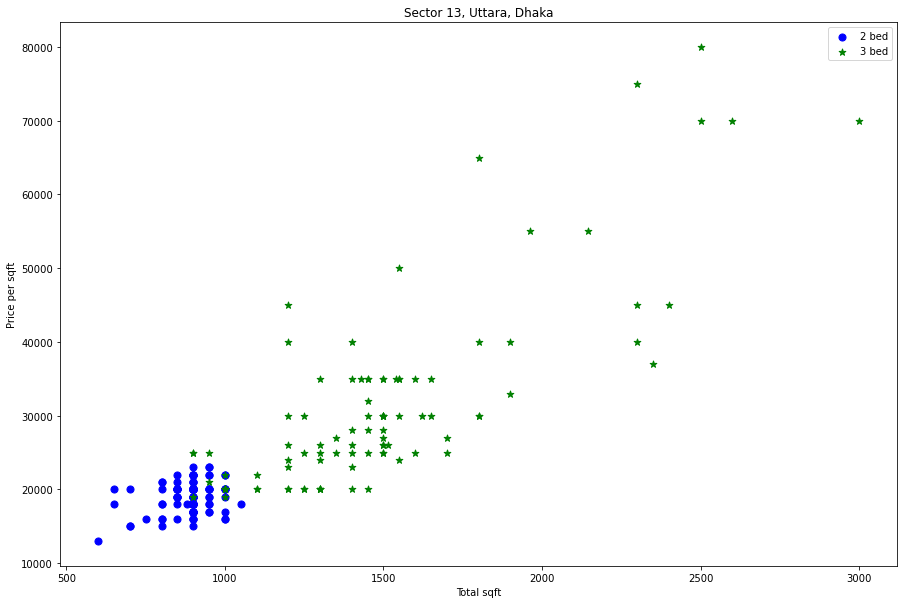

In [105]:
# check if the price for 3 bedroom apartments is greater than the price for 4 or more bedroom apartments:
# use scatterplot to view:
def plot_scatter_chart(df, adress):
    bed2 = df[(df.adress==adress) & (df.bedroom==2)]
    bed3 = df[(df.adress==adress) & (df.bedroom==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bed2.area,bed2.price, color='blue',label='2 bed', s=50)
    plt.scatter(bed3.area,bed3.price, marker='*', color='green', label='3 bed', s=50)
    plt.xlabel('Total sqft')
    plt.ylabel('Price per sqft')
    plt.title(adress)
    plt.legend()
    
plot_scatter_chart(df6,"Sector 13, Uttara, Dhaka")